##**I am Sujitha Rasamsetty .This is my First Task in DataScience Internship at Let's Grow More(LGM) VIP batch August-2021**.

##**My First task is to predict  Iris Flowers Classification ML Project**.

##**Iris Flowers Classification ML Project**


## **STEP 1 :IMPORT**

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets,model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [ ]:
plt.rcParams['figure.figsize']=(15,9)

## **STEP 2 : DATASET**

In [ ]:
data=datasets.load_iris()

In [ ]:
X=data['data']
y=data['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size=0.8,random_state=15)

## **PLOTTING OF TRAINING DATA**

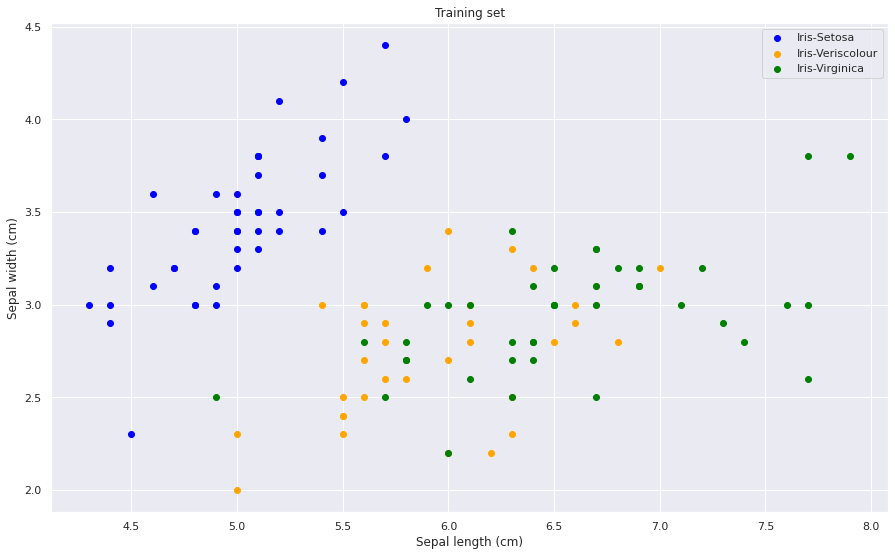

In [ ]:
labels={0: "Iris-Setosa",1:'Iris-Veriscolour',2: 'Iris-Virginica'}
label_colours = ['blue','orange','green']

def plot_data(x,y,labels,colours,a=0,b=1,title='Training set'):
  for c in np.unique(y):
    inx = np.where(y == c)
    plt.scatter(x[inx, a], x[inx, b], label=labels[c],c=colours[c])
  plt.title(title)
  plt.xlabel("Sepal length (cm)")
  plt.ylabel("Sepal width (cm)")
  plt.legend()

plt.figure(figsize=(15,9))
plot_data(X_train, y_train, labels, label_colours)
plt.show()


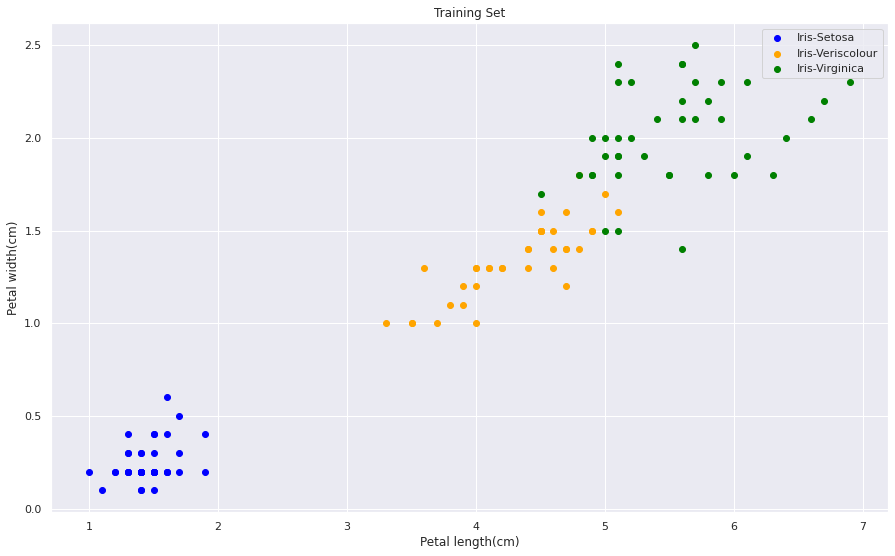

In [ ]:
#plot the training data

labels = {0: 'Iris-Setosa',1:'Iris-Veriscolour',2:'Iris-Virginica'}
label_colours =['blue','orange','green']

plt.figure(figsize=(15,9))
#plot the data(X_train,y_train,labels,label_colours,a=2,b=3)
for c in np.unique(y_train):
  inx = np.where(y_train == c)
  plt.scatter(X_train[inx, 2],X_train[inx, 3],label=labels[c],c=label_colours[c])
plt.title("Training Set")
plt.xlabel("Petal length(cm)")
plt.ylabel("Petal width(cm)")
plt.legend()
plt.show()  


## **TRAINING OF FULL DATASET**

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
tf.keras.backend.clear_session()
mlp = Sequential([ 
                  Dense(3,input_shape=(4,),activation='softmax')])
mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history =mlp.fit(X_train, y_train, validation_split=0.1,batch_size=16, epochs=1000, verbose=0)

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.041393,0.462963,1.112553,0.416667
1,1.025272,0.481481,1.092079,0.416667
2,1.010483,0.490741,1.070779,0.416667
3,0.995261,0.509259,1.049960,0.416667
4,0.980688,0.527778,1.030308,0.416667


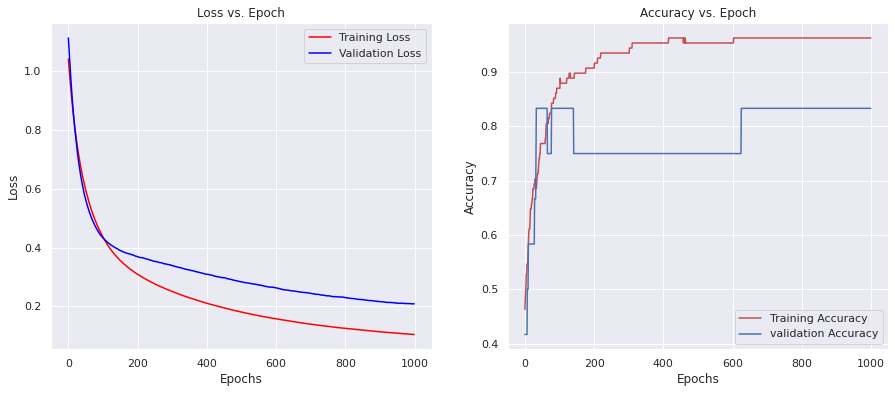

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [ ]:
mlp.evaluate(X_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.9500


[0.11495999991893768, 0.949999988079071]

In [ ]:
print(f'Test Accuracy : {mlp.evaluate(X_test,y_test)[1]: .2%}')

1/1 [==============================] - 0s 15ms/step - loss: 0.0859 - accuracy: 1.0000
Test Accuracy :  100.00%


## **DATASET (SEPAL)**

In [ ]:
X_train, X_test,y_train,y_test=model_selection.train_test_split(X[:, :2],y,train_size=0.8,random_state=15)

#Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(120, 2)

## **ARTIFICIAL NUERAL NETWORK(ANN)**

In [ ]:
tf.keras.backend.clear_session()
classifier = Sequential([
                         Dense(5,input_shape=(2,),activation='relu'),
                         Dense(3,activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = classifier.fit(X_train,y_train,validation_split=0.1,batch_size=16,epochs=1000,verbose=0)

In [ ]:
df=pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.377150,0.805556,0.333433,0.916667
996,0.377001,0.805556,0.333030,0.916667
997,0.377093,0.805556,0.335088,0.916667
998,0.376991,0.805556,0.335787,0.916667
999,0.376981,0.805556,0.336221,0.916667


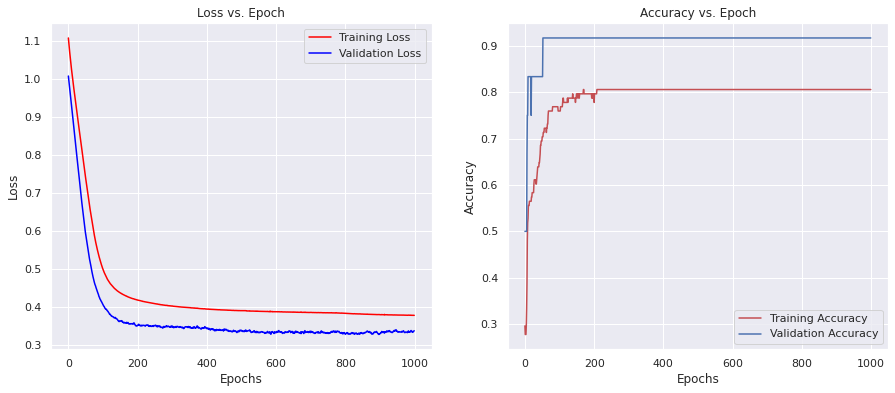

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [ ]:
classifier.evaluate(X_train,y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8167


[0.3727641999721527, 0.8166666626930237]

In [ ]:
print(f'Test Accuracy: {classifier.evaluate(X_test,y_test)[1]: .2%}')

1/1 [==============================] - 0s 20ms/step - loss: 0.3508 - accuracy: 0.9000
Test Accuracy:  90.00%


## **EVALUATE USING CONFUSION MATRIX**

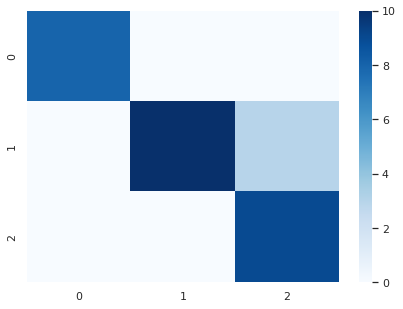

In [ ]:
y_pred = np.argmax(classifier.predict(X_test),axis=1)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap="Blues")

In [ ]:
def get_meshgrid(x0_range, x1_range,num_points=100):
  x0 = np.linspace(x0_range[0],x0_range[1],num_points)
  x1 = np.linspace(x1_range[0],x1_range[1],num_points)

  return np.meshgrid(x0,x1)
  


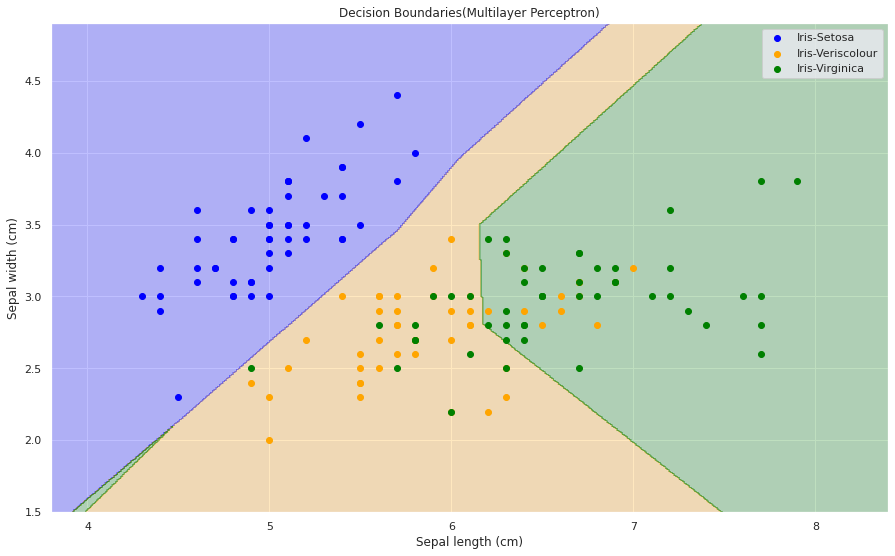

In [ ]:
#Visualization

num_points = 500
x_mesh,y_mesh=get_meshgrid([X[:, 0].min() - 0.5,X[:, 0].max() + 0.5],
                                        [X[:,1].min() - 0.5,X[:,1].max() + 0.5],num_points=num_points)

y_pred =np.argmax(classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)),axis=1).reshape(num_points,num_points)

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)


plot_data(X,y,labels,label_colours,title='Decision Boundaries(Multilayer Perceptron)')
plt.show()

## **LOGISTIC REGRESSION**

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#result test

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 1])

## **EVALUATION USING CONFUSION MATRIX**

Test Accuracy: 90.00%


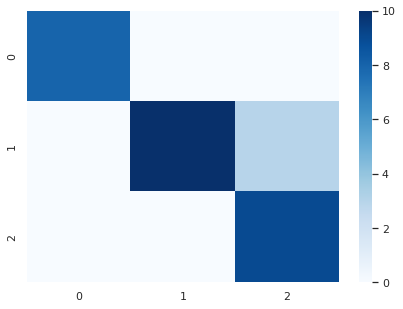

In [ ]:
#evaluate using confusion matrix

cm=confusion_matrix(y_test,y_pred)
diagonal=np.sum(np.diagonal(cm))
Accuracy=diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy:.2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

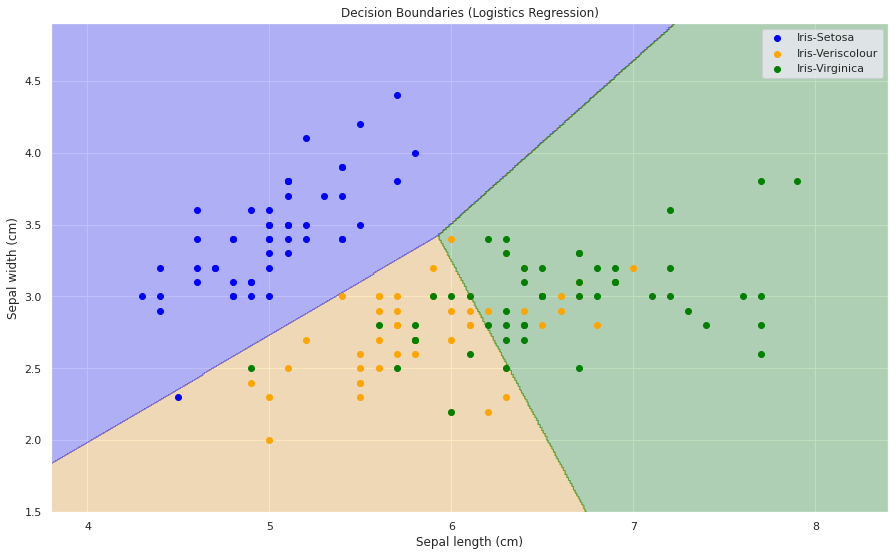

In [ ]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[ :, 0].min()- 0.5,X[:,0].max() + 0.5],
                             [X[:, 1].min()-0.5,X[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries (Logistics Regression)')
plt.show()

## **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

Test Accuracy :  90.00%


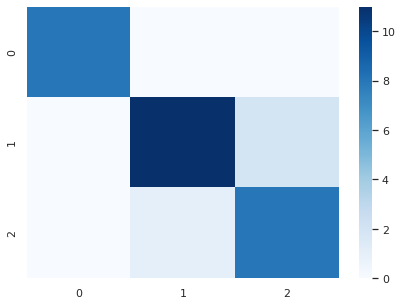

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy=diagonal / len(y_test)
print(f'Test Accuracy : {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

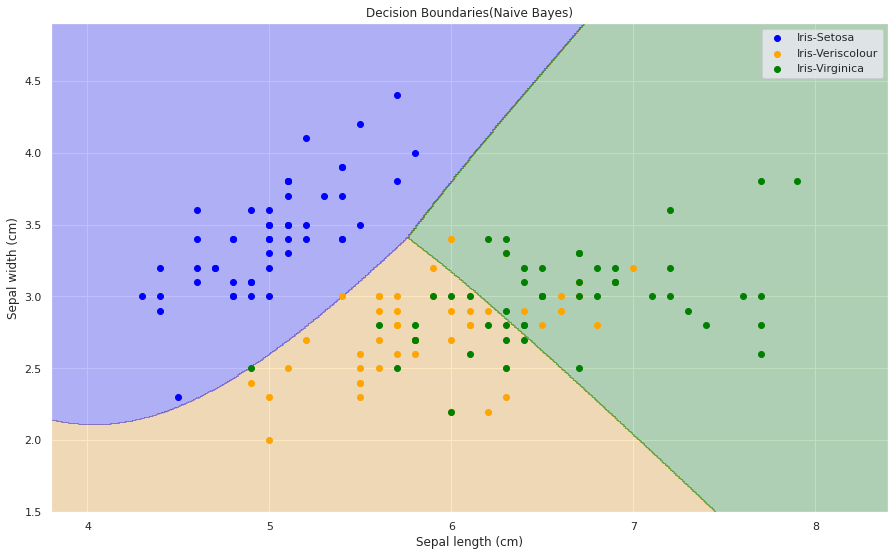

In [ ]:
#visualise

num_points =500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() -0.5,X[:,0].max() +0.5],
                             [X[:,1].min() -0.5,X[:,1].max() +0.5],num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Naive Bayes)')
plt.show()

## **SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
#linear ,'poly','rbf','sigmoid','percomputed'

In [ ]:
from sklearn.svm import SVC
classifier =SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

Test Accuracy :  86.67%


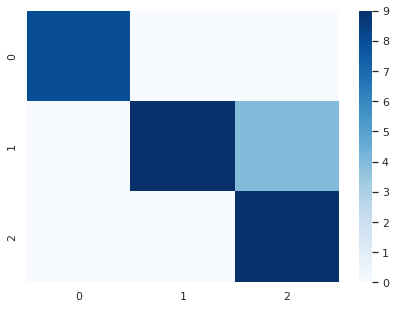

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy : {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

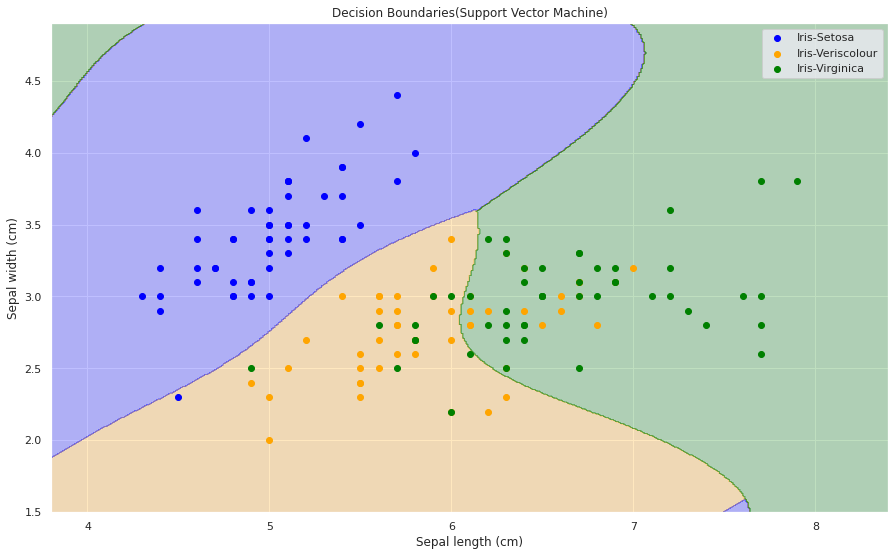

In [ ]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Support Vector Machine)')
plt.show()

## **K-NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

Test Accuracy:  70.00%


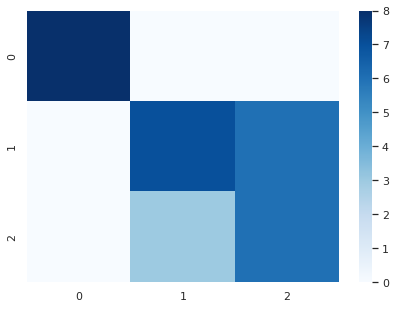

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

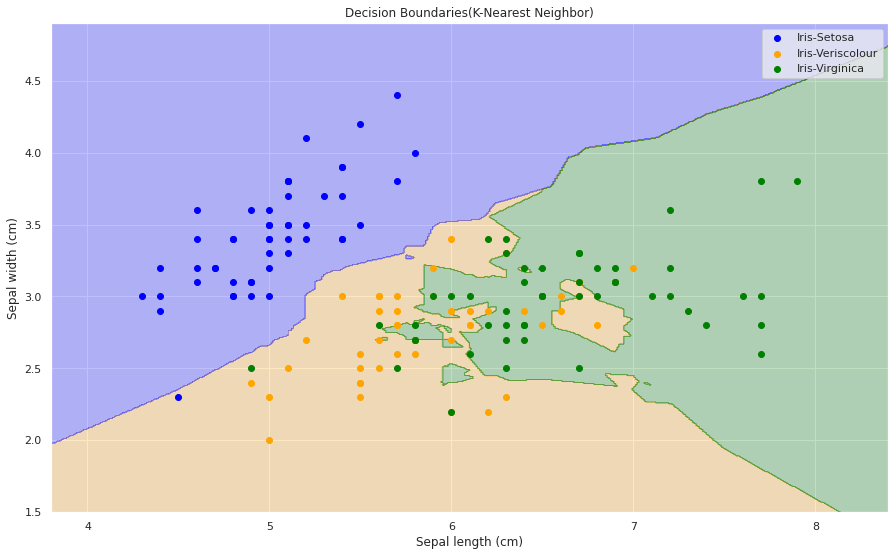

In [ ]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(K-Nearest Neighbor)')
plt.show()

## **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

Test Accuracy:  76.67%


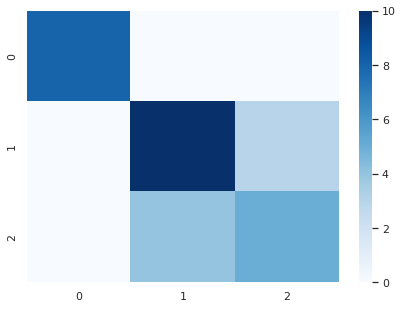

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

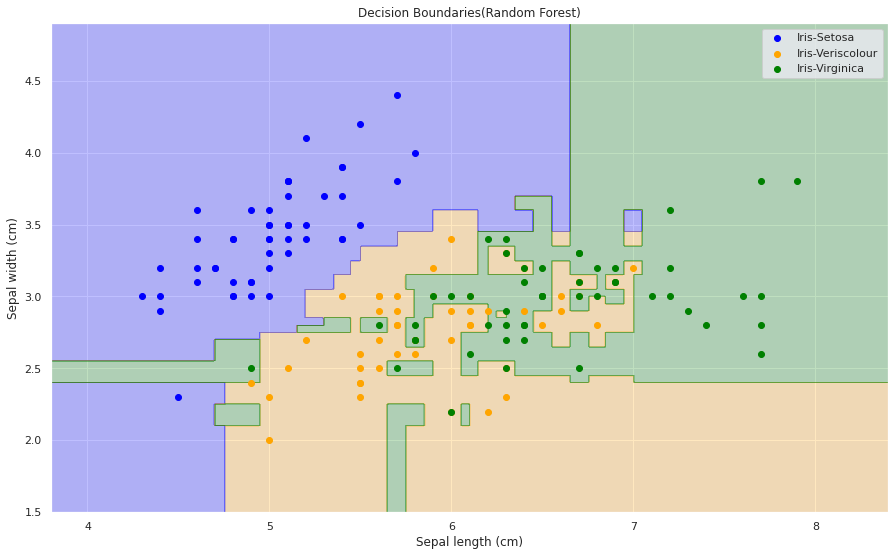

In [ ]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Random Forest)')
plt.show()